In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('survey_results_public.csv')
data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
df = data[['Country','DevType','EdLevel','YearsCodePro','Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'}, axis=1)
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Developer, front-end;Developer, full-stack;Dev...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [4]:
df = df[df['Salary'].notnull()]
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Developer, back-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Developer, full-stack;Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,Engineering manager,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   DevType       37989 non-null  object 
 2   EdLevel       38054 non-null  object 
 3   YearsCodePro  37935 non-null  object 
 4   Employment    38067 non-null  object 
 5   Salary        38071 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Employed, part-time;Retired', 'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [8]:
df['Employment'] = df['Employment'].str.split(";")
df['Employment'] = df['Employment'].str[0]

In [9]:
df['Employment'].unique()

array(['Employed, full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time'], dtype=object)

In [10]:
df = df[df['Employment'] == 'Employed, full-time']
df = df.drop('Employment', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34264 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34264 non-null  object 
 1   DevType       34264 non-null  object 
 2   EdLevel       34264 non-null  object 
 3   YearsCodePro  34264 non-null  object 
 4   Salary        34264 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [11]:
df['DevType'].unique()

array(['Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site reliability',
       'Developer, full-stack', 'Developer, back-end', ...,
       'Developer, mobile;Database administrator',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Database administrator;DevOps specialist;Project manager;System administrator',
       'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Database administrator;Developer, embedded applications or devices;Cloud infrastructure engineer'],
      dtype=object)

In [12]:
df['DevType'] = df['DevType'].str.split(";")
df['DevType'] = df['DevType'].str[0]

In [13]:
df['DevType'].value_counts()

Developer, full-stack                            9904
Developer, front-end                             8508
Developer, back-end                              6579
Data scientist or machine learning specialist    1805
Engineer, data                                   1269
Developer, mobile                                1110
Developer, desktop or enterprise applications    1008
Engineer, site reliability                        786
Other (please specify):                           472
Developer, embedded applications or devices       465
Engineering manager                               383
DevOps specialist                                 338
Developer, QA or test                             275
Academic researcher                               256
Data or business analyst                          139
Educator                                          129
Senior Executive (C-Suite, VP, etc.)              121
Developer, game or graphics                       115
Cloud infrastructure enginee

In [14]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [15]:
dev_map = shorten_categories(df['DevType'].value_counts(), 100)
df['DevType']  = df['DevType'].map(dev_map)
df['DevType'].value_counts()

Developer, full-stack                            9904
Developer, front-end                             8508
Developer, back-end                              6579
Data scientist or machine learning specialist    1805
Engineer, data                                   1269
Developer, mobile                                1110
Developer, desktop or enterprise applications    1008
Engineer, site reliability                        786
Other                                             498
Other (please specify):                           472
Developer, embedded applications or devices       465
Engineering manager                               383
DevOps specialist                                 338
Developer, QA or test                             275
Academic researcher                               256
Data or business analyst                          139
Educator                                          129
Senior Executive (C-Suite, VP, etc.)              121
Developer, game or graphics 

In [16]:
country_map = shorten_categories(df['Country'].value_counts(), 300)
df['Country']  = df['Country'].map(country_map)
df['Country'].value_counts()

United States of America                                8286
Other                                                   7830
Germany                                                 2538
United Kingdom of Great Britain and Northern Ireland    2433
India                                                   2046
Canada                                                  1362
France                                                  1201
Brazil                                                  1161
Spain                                                    921
Netherlands                                              749
Poland                                                   748
Australia                                                740
Italy                                                    710
Sweden                                                   595
Russian Federation                                       485
Switzerland                                              438
Turkey                  

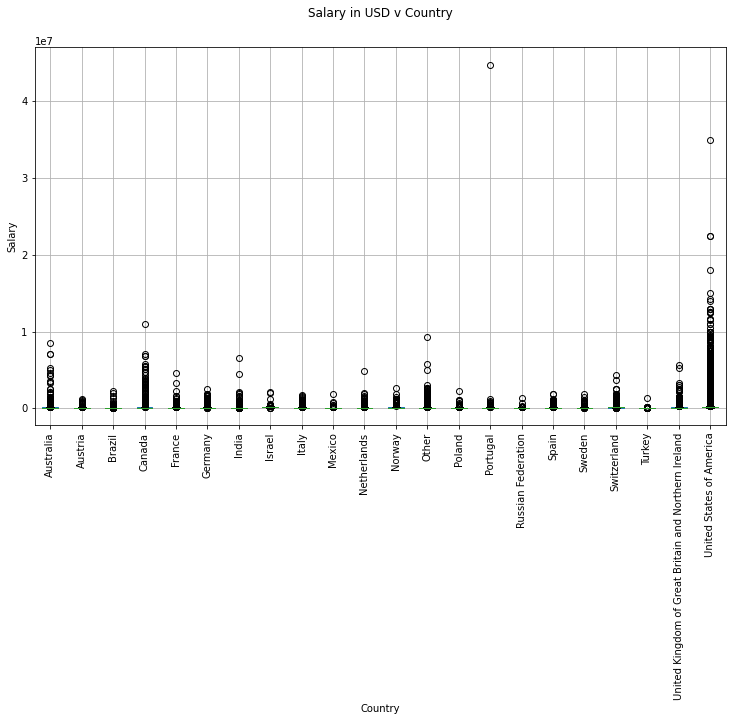

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary in USD v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()                       

In [20]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']
df = df[df['DevType'] != 'Other']
df = df[df['DevType'] != 'Other (please specify):']

In [18]:
df['YearsCodePro'].unique()

array(['5', '17', '6', '2', '10', '4', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '1', '28', '24', '11', '23', '45',
       'Less than 1 year', '18', '37', '46', '13', '32', '40', '27', '16',
       '31', '26', '30', '34', '35', '42', '38', '36', '39', '29', '41',
       '33', '48', '44', '43', 'More than 50 years', '47', '49', '50'],
      dtype=object)

In [19]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

In [20]:
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [21]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [22]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Master’s degree" in x:
        return "Master's degree"
    return "Less than a Bachelors"

In [23]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", 'Less than a Bachelors'],
      dtype=object)

In [24]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 1])

In [25]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([20,  7, 10, 21, 12,  1,  8,  3,  5, 13, 11,  4,  2, 17, 16, 19,  6,
       14,  9, 18,  0, 15])

In [26]:
le_dev = LabelEncoder()
df['DevType'] = le_dev.fit_transform(df['DevType'])
df['DevType'].unique()

array([ 3, 10,  6, 16, 14,  7,  9, 17,  8, 18, 15,  5, 19,  4, 12,  2,  0,
       11, 13,  1])

In [27]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=1)

# Linear regression

In [30]:
linear_reg = LinearRegression()
linear_reg.fit(xtrain,ytrain)

LinearRegression()

In [31]:
y_pred = linear_reg.predict(xtest)

In [32]:
error = np.sqrt(mean_squared_error(ytest,y_pred))
error

653082.2010399568

In [33]:
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.019976810697416303
MAE 184283.87349091945


# Decision tree

In [34]:
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [35]:
y_pred = decision_tree_reg.predict(xtest)
error = np.sqrt(mean_squared_error(ytest,y_pred))
error

778022.1654866734

In [36]:
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score -0.39086377665130745
MAE 196758.36842073675


# Random forest

In [37]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(xtrain,ytrain)

RandomForestRegressor()

In [38]:
y_pred = random_forest_reg.predict(xtest)
error = np.sqrt(mean_squared_error(ytest,y_pred))
error

691500.473188049

In [39]:
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score -0.09871643231235461
MAE 188970.7463782429


In [40]:
max_depth = [None]
min_samples_split = (0.0, 1.0)
parameters = {'max_depth': max_depth,
              'min_samples_split': min_samples_split}

regressor = DecisionTreeRegressor(random_state = 33)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X, y.values)

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 259, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in 

GridSearchCV(estimator=DecisionTreeRegressor(random_state=33),
             param_grid={'max_depth': [None], 'min_samples_split': (0.0, 1.0)},
             scoring='neg_mean_squared_error')

In [41]:
regressor = gs.best_estimator_

regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
error

710924.56984351

In [44]:
n_estimators = [300]
max_depth = [None]
min_samples_split = [3]
parameters = {'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'n_estimators':n_estimators}


regressor = RandomForestRegressor(random_state = 33)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X, y.values)


regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
error

641143.1205002771

In [43]:
gs.best_estimator_

RandomForestRegressor(min_samples_split=3, n_estimators=300, random_state=33)

# Prediction

In [45]:
X = np.array([["India","Data scientist or machine learning specialist","Master's degree", 2]])
X

array([['India', 'Data scientist or machine learning specialist',
        "Master's degree", '2']], dtype='<U45')

In [46]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_dev.transform(X[:,1])
X[:, 2] = le_education.transform(X[:,2])
X = X.astype(float)
X

array([[6., 3., 2., 2.]])

In [47]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([22117.61779922])

In [48]:
data = {"model": regressor, "le_country":le_country, "le_dev":le_dev, "le_education":le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [49]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data['model']
le_country = data['le_country']
le_dev = data['le_dev']
le_education = data['le_education']

In [50]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Mitali\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([22117.61779922])